<a href="https://colab.research.google.com/github/robertpaukovic1/projekt-NNDL-2024./blob/main/Projekt_NNDL_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Implementacija modela za klasifikaciju zastava država koristeći konvolucijske neuronske mreže**

Cilj ovog projektnog zadataka je na temelju skupa podataka podijeljenog na trening, validaciju i test stvoriti model koji će na temelju ulazne slike na kojoj se nalazi neka zastava prepoznati o kojoj je državi riječ.

Trening podaci će se koristiti za stvaranje, i treniranje modela upotrebom konvolucijske neuronske mreže te će se provoditi probna evaluacija točnosti modela na validacijskom te finalna evaluacija na testnim podacima.

Na slici je prikazane su zastave koje nisu preuzete niti sa jednog podskupa podataka kako mala vizualna motivacija i interes za zanimanjem funkcionalnosti modela.    

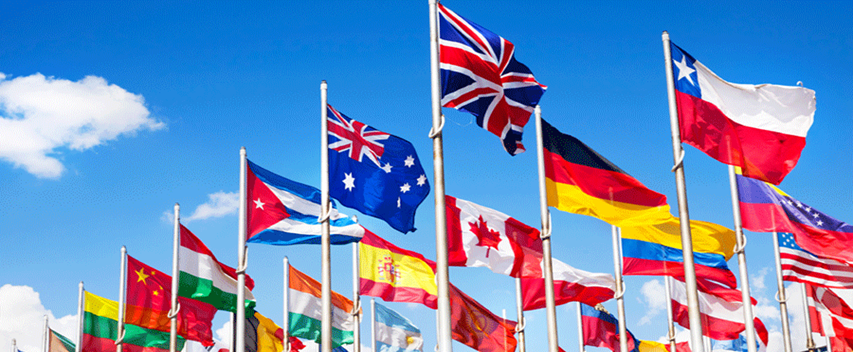





Prije nego što se krene u proces stvaranja i treniranja modela konvolucijske neuronske mreže potrebno je svaki puta učitati komprimirani skup podataka sa lokalnog računala što može potrajati par minuta i to samo u slučaju ako sa lijeve strane u Google Colab direktoriju nije prisutan taj skup podataka. Nakon što se učita potrebno je taj skup podataka raspakirati koji se sastoji od podmapa za treniranje, validaciju i testiranje.

In [ ]:
!unzip Flags.v2i.multiclass\ \(1\).zip

In [ ]:
!pip install seaborn

In [ ]:
!pip install pandas

U ćeliji prikazano je pokretanje potrebnih Python biblioteka te funkcija koja učitava kompletan skup podataka sa navedenog direktorija.

In [ ]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


def load_from_dir(dirname):
  df=pd.read_csv(dirname+"/_classes.csv")

  x_train=[]
  y_train=[]

  for index, row in df.iterrows():
    name=row["filename"]
    img = Image.open(dirname + "/" +name)
    img = img.convert("RGB")
    img = img.resize((50, 50))
    img = np.array(img)
    x_train.append(img)
    label = [row[" Canada"], row[" China"], row[" Germany"], row[" India"], row[" Japan"], row[" Pakistan"], row[" Russia"], row[" South-Korea"],row[" United-Kingdom"], row[" United-States"]]
    y_train.append(label)

  x_train=np.array(x_train)
  y_train=np.array(y_train)

  x_train=x_train/255
  return x_train, y_train



**Učitavanje trening skupa podataka**  

U sljedećoj ćeliji se učitava trening skup podataka koji se sastoji od 753 trening slike te 10 pripadajućih klasa. Trening slike su zapravo zastave država, dok klase predstavljaju identifikator i naziv države kojem zastave pripadaju.

In [ ]:
x_train, y_train= load_from_dir("train")

**Učitavanje validacijskog skupa podataka**  

U ovoj ćeliji učitava se validacijski skup podataka koji se sastoji od 71 slike i te će se slike koristiti u probnoj evaluaciji. Probnom evaluacijom i prije svega treniranjem modela nastoji se pripremiti model za finalnu evaluaciju tj. prepoznavanje zastava koje nikada nisu viđene u trening skupu podataka.

In [ ]:
x_valid, y_valid= load_from_dir("valid")

**Učitavanje testnog skupa podataka**  

U sljedećoj ćeliji učitava se testni skup podataka koji će se koristiti na samom kraju izrade projektnog zadatka gdje će svoj model pokazati konačno znanje koliko je tokom treninga i validacije ispravno prepoznavao države na temelju slike zastava. Zastave koje je vidio u trening skupu itekako se razlikuju na testnom skupu i te slike prije finalne evaluacije ne smije vidjeti jer testni skup bi izgubio na smislu.

In [ ]:
x_test, y_test= load_from_dir("test")

#**Lagana motivacija: Klasična neuronska mreža**  

U ovom primjeru stvorena je jedna klasična neuronska mreža koja će kroz trening i validaciju poslužiti kao podloga za stvaranje konvolucijske neuronske mreže koje su dosta drugačije i složenije. Cilj ove lagane motivacije je upotrebom hiperparametara prije treninga doći do što bolje točnosti na validacijskom skupu nakon što se završi trening mreže. Solidnim uspjehom na temelju točnosti neuronske mreže tokom validacije poslužiti će kao motivacija da se izgradi prva konvolucijska neuronska mreža.  



**Pregled dimenzije slika na trening skupu podataka**   

Na sljedećem primjeru su prikazane broj i dimenzije slika iz trening skupa te 10 klasa iz trening skupa.


In [ ]:
x_train.shape, y_train.shape

((753, 50, 50, 3), (753, 10))

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers

model = models.Sequential([
  keras.Input(shape=(50,50,3)),
  layers.Flatten(),
  layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
   layers.Dropout(0.25),
  layers.Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.1)),
  layers.Dropout(0.25),
  layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train,
    y_train,
    batch_size=530,
    epochs=50,
    validation_data=(x_valid, y_valid),
    validation_split=0.2
)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

model.evaluate(x_test, y_test)



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 7500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │       3,840,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,108,298 (15.67 MB)

 Trainable params: 4,108,298 (15.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.1011 - loss: 149.4578 - val_accuracy: 0.1549 - val_loss: 147.3716
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1174 - loss: 147.1923 - val_accuracy: 0.1408 - val_loss: 145.1421
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1286 - loss: 144.9878 - val_accuracy: 0.1549 - val_loss: 142.9001
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1694 - loss: 142.7336 - val_accuracy: 0.2676 - val_loss: 140.7097
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1813 - loss: 140.5442 - val_accuracy: 0.2254 - val_loss: 138.5275
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1785 - loss: 138.3785 - val_accuracy: 0.2817 - val_loss: 136.3674
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2021 - loss: 136.2348 - val_accuracy: 0.2958 - val_loss: 134.2536
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2011 - loss: 134.0918 - val_accuracy

[68.19772338867188, 0.5945945978164673]

**Implementacija grafičkih prikaza funkcije gubitka te točnosti  modela na trening i validaciji**   

U sljedećem primjeru je prikazana implementacija dva grafička prikaza jedan je kako se pobpoljšavaju i pogoršavaju funkcije gubitka tj. koliko smo zadovoljni ili nezadovoljni sa modelom koji prepoznava državu na temelju slike zastave, a drugi graf će prikazivati odnos točnosti na trening i validaciji i prepoznati znakove pretreniranosti ili podtreniranosti ili da li model postiže prihvatljive rezultate.



In [ ]:
def plot_model_accuracy(history):
  loss_train = history.history['accuracy']
  loss_val = history.history['val_accuracy']
  epochs = range(1, len(loss_train)+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def plot_model_loss(history):
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  epochs = range(1, len(loss_train)+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

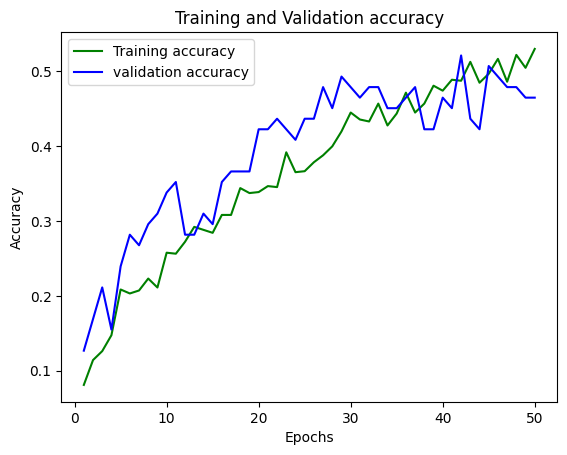

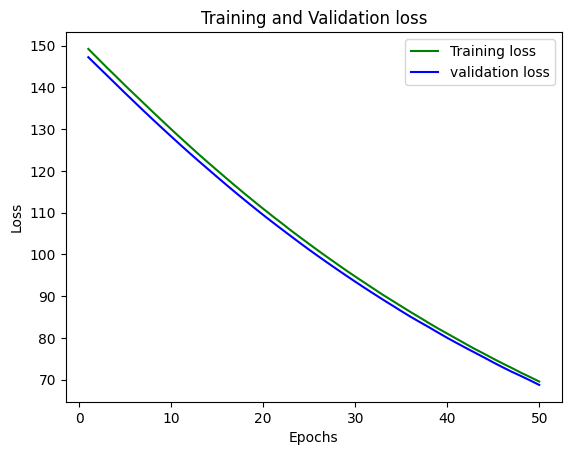

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

#**Stvaranje i prikaz konfuzijske matrice**   
Svrha korištenja konfizijske matrice je zapravo prikazati evaluaciju klasifikacijskom modela. Ona prikazuje usporedbu stvarne klase sa predviđenim modelom klase. Na sljedećem primjeru uključena je biblioteka sklearn iz koje se uključuje matrica zbunjenosti ili konfuzijska matrica. Konfuzijska matrica prima argumente stvarne klase i predviđene klase. Da bi se mogla lijepo prikazati ta konfizijska matrica potrebno je uključiti i matplotlib biblioteku kao plt koja će prikazati bilo koji grafički prikaz te prikazati tako i konfuzijsku matricu.


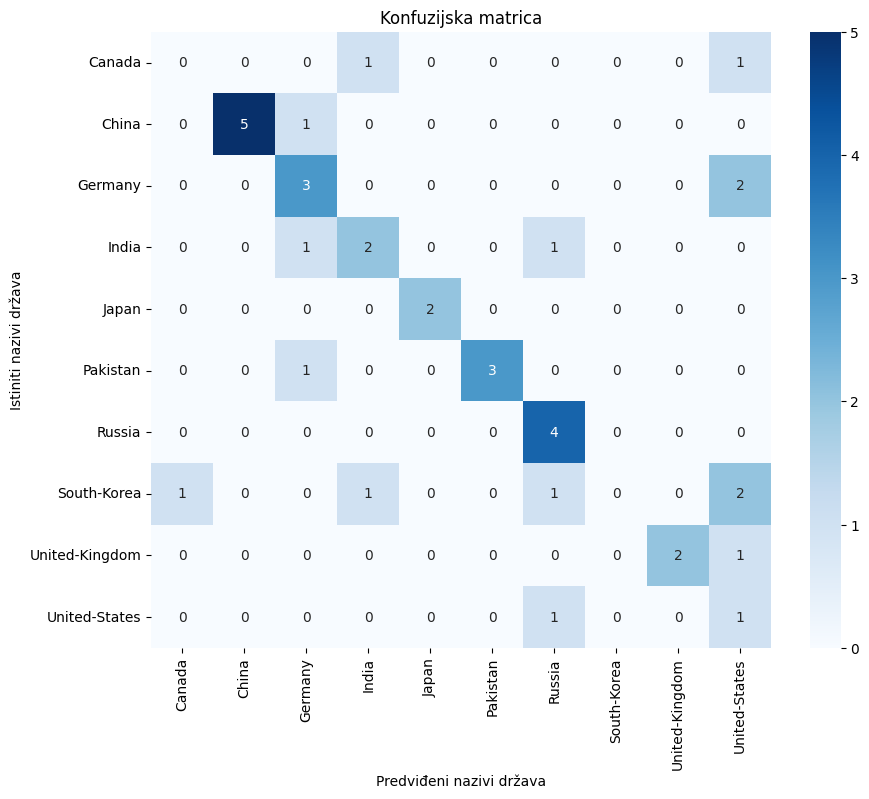

In [ ]:
state_names = ['Canada', 'China', 'Germany', 'India', 'Japan',
               'Pakistan', 'Russia', 'South-Korea', 'United-Kingdom', 'United-States']
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=state_names, yticklabels=state_names)
plt.xlabel('Predviđeni nazivi država')
plt.ylabel('Istiniti nazivi država')
plt.title('Konfuzijska matrica')
plt.show()

**Prikaz klasifikacijskog izvješća**  

Stvaranjem klasifikacijskog izvješća nastoji se prikazati koliko je model bio precizan u predickciji, zatim prikazuje se njegov odaziv te na temelju preciznosti i odaziva izračunava se f1-score koji je zapravo haromonijska sredina koja određuje balans modela na temelju preciznosti i odaziva modela.

In [ ]:
label=["Canada", "China", "Germany", "India", "Japan", "Pakistan", "Russia", "South-Korea", "United-Kingdom", "United-States"]
class_report = classification_report(y_true, y_pred_classes, target_names=label)
print(class_report)

                precision    recall  f1-score   support

        Canada       0.00      0.00      0.00         2
         China       1.00      0.83      0.91         6
       Germany       0.50      0.60      0.55         5
         India       0.50      0.50      0.50         4
         Japan       1.00      1.00      1.00         2
      Pakistan       1.00      0.75      0.86         4
        Russia       0.57      1.00      0.73         4
   South-Korea       0.00      0.00      0.00         5
United-Kingdom       1.00      0.67      0.80         3
 United-States       0.14      0.50      0.22         2

      accuracy                           0.59        37
     macro avg       0.57      0.59      0.56        37
  weighted avg       0.60      0.59      0.58        37



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Gdje model najviše griješi ?**  

U sljedećem primjeru biti prikazan kod koji na temelju 10 klasa će prebrojati i izračunati koliko je model u krivu tj. koliko se stvarna klasa razlikuje od predviđene klase ?

In [ ]:
broj_gresaka = 10
errors = np.where(y_pred_classes != y_true)[0]
errors

array([ 1,  2,  5,  6,  8, 14, 16, 17, 20, 23, 25, 26, 27, 28, 35])

**Prikaz pogrešnih klasifikacija**     

U sljedećem primjeru je prikazano preko plt slika zastave država, ispravna klasa te naziv predviđene klase. Na temelju slika vidimo da klasifikator je totalno pogriješio na nekim državama kada je predviđao državu na temelju ulaznih slika zastava.

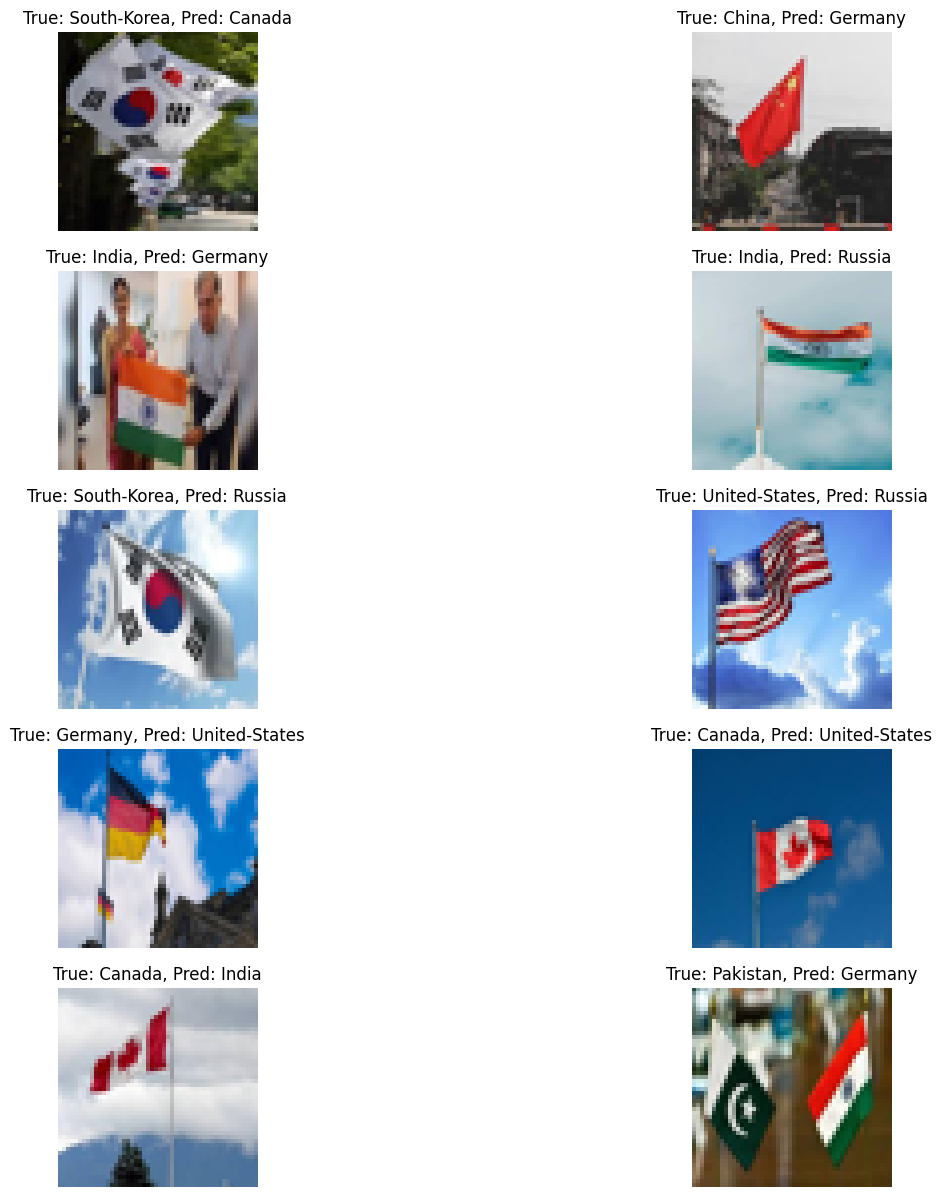

In [ ]:
plt.figure(figsize=(15, 15))
for i, error_index in enumerate(errors[:broj_gresaka]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[error_index])
    plt.title(f"True: {label[y_true[error_index]]}, Pred: {label[y_pred_classes[error_index]]}")
    plt.axis('off')
plt.show()

**Gdje je model dobar?**  

Na sljedećem primjeru je prikazano gdje je model ispravno prepoznao državu na temelju zastave i koliko je točan.



[ 0  3  4  7  9 10 11 12 13 15 18 19 21 22 24 29 30 31 32 33 34 36]


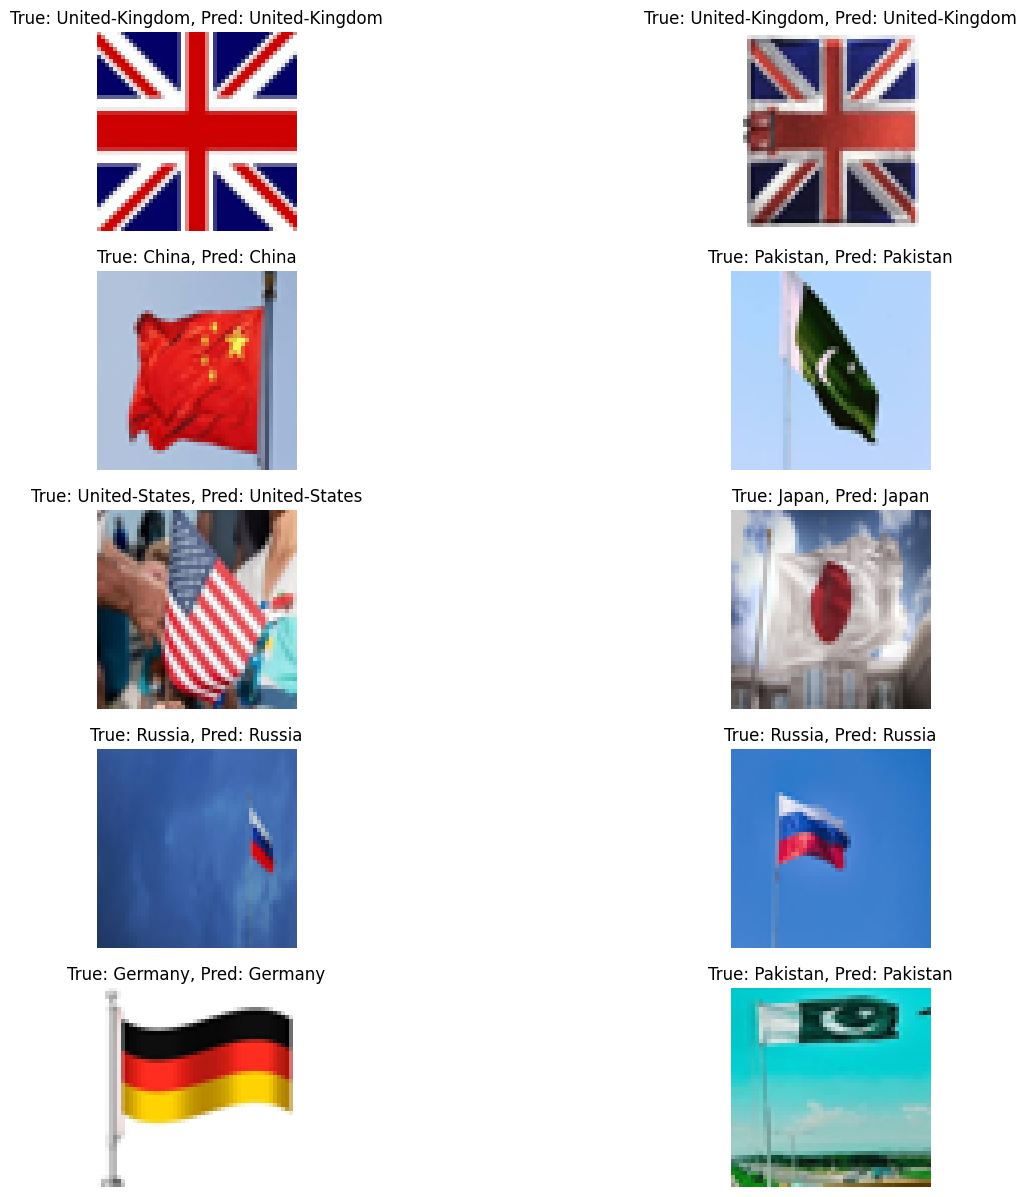

In [ ]:
broj_tocnih = 10

correct_indices = np.where(y_pred_classes == y_true)[0]

print(correct_indices)

plt.figure(figsize=(15, 15))
for i, correct_index in enumerate(correct_indices[:broj_tocnih]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[correct_index])
    plt.title(f"True: {label[y_true[correct_index]]}, Pred: {label[y_pred_classes[correct_index]]}")
    plt.axis('off')
plt.show()

#**Zaključak**   

Na temelju izgranje te treniranjem neuronske mreže te prikaza rezultata točnosti modela kroz konfuzijsku matricu i prikaza slika gdje je model dobar i gdje griješi te na temelju grafova napretka točnosti i funkcija gubitaka , može se zaključiti da klasična tj. općenita neuronska mreža ne pokazuje dovoljnu značajnost da bi bio dobar u klasifikaciji slika. To se može vidjeti u razlici točnosti na trening skupa i validacijskog skupa. Na početku prije dodavanja droput regularizacije i prije dodavanja adam oprimizatora i ostalih hiperparametara, značajno se pokazala pretreniranost koja se ublažila s vremenom na vrijeme. Alternativa za klasifikaciju zastave država koristiti će se konvolucijska neuronska mreža.



In [ ]:
x_train.shape, y_train.shape

((753, 50, 50, 3), (753, 10))

#**Prva konvolucijska neuronska mreža**  

U ovoj ćeliji je prikazan prvi model konvolucijske neuronske mreže. Ta mreža može se koristiti za cijelovremeno eksperimentiranje radi poboljšanja točnosti ili može poslužiti kao paleta za stvaranje još bolje, dublje i jednostavnije konvolucijske neuronske mreže.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = models.Sequential([
  keras.Input(shape=(50,50,3)),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.Dropout(0.5),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.Dropout(0.5),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.Dropout(0.5),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.1) ),
  layers.Dense(10, activation='softmax')

])

model.summary()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
      x_train,
      y_train,
      batch_size=256,
      epochs=50,
      validation_data=(x_valid, y_valid),
      validation_split=0.2

)



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 44, 44, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 44, 44, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,818,314 (121.38 MB)

 Trainable params: 31,818,314 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.1080 - loss: 103.7330 - val_accuracy: 0.1690 - val_loss: 98.4204
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 136ms/step - accuracy: 0.1346 - loss: 98.1936 - val_accuracy: 0.0845 - val_loss: 92.9863
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.1467 - loss: 91.9230 - val_accuracy: 0.0845 - val_loss: 87.3758
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.1195 - loss: 86.2612 - val_accuracy: 0.1127 - val_loss: 81.7439
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.1262 - loss: 80.5806 - val_accuracy: 0.1268 - val_loss: 76.2106
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.1495 - loss: 75.0691 - val_accuracy: 0.1127 - val_loss: 70.8435
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.1699 - loss: 69.7392 - val_accuracy: 0.1408 - val_loss: 65.6913
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.1677 - loss: 64.6365 - val_accuracy: 0.1

Na prvom grafu je prikazano odnost točnosti modela na trening i validacijskom skupu te na drugom grafu jev prikazan gubitak na trening i validaciji.

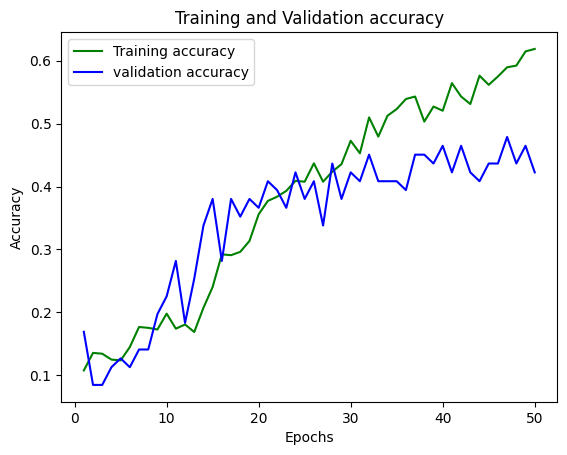

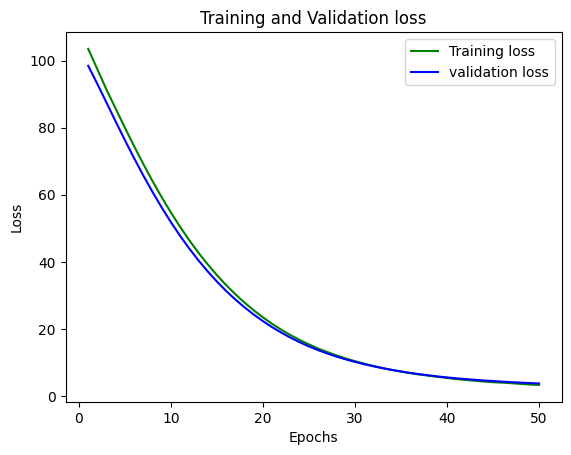

In [ ]:
plot_model_accuracy(history)
plot_model_loss(history)

**Prvi pokušaj: CNN sa L2 regularizacijom te SGD optimizatorom**     

Iz prethodnog modela risutan je blaži overfitt zato u sljedećim primjerima će biti prikazan modeli sa dodatnim i novim hiperparametrima koji će spriječiti to.
U prvom primjeru prikazana je CNN mreža koja koristi čisti SGD optimizator. Ispod izgrađene CNN mreže se nalazi krivulje točnosti i funkcije gubitaka koje pokazuju klasično koliko smo zadovoljni sa klasifikacijom zastava ili koliko smo razočarani rezultatima.






In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3, 3), padding='same', activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))


model.add(layers.Conv2D(128,(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))


model.add(layers.Conv2D(256,(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history1=model.fit(
          x_train,
          y_train,
          batch_size=256,
          epochs=100,
          validation_data=(x_valid, y_valid)
          )


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 25, 25, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,906,570 (22.53 MB)

 Trainable params: 5,906,570 (22.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 30s 8s/step - accuracy: 0.0926 - loss: 99.3151 - val_accuracy: 0.0563 - val_loss: 99.2227
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.0934 - loss: 99.1987 - val_accuracy: 0.0423 - val_loss: 99.1064
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.1085 - loss: 99.0826 - val_accuracy: 0.0423 - val_loss: 98.9902
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.0944 - loss: 98.9667 - val_accuracy: 0.0423 - val_loss: 98.8742
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.1024 - loss: 98.8504 - val_accuracy: 0.0423 - val_loss: 98.7583
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.1087 - loss: 98.7342 - val_accuracy: 0.0423 - val_loss: 98.6426
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.0936 - loss: 98.6189 - val_accuracy: 0.0563 - val_loss: 98.5270
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.1141 - loss: 98.5026 - val_accurac

In [ ]:
plot_model_accuracy(history1)
plot_model_loss(history1)

**Augumentacija podataka**   

Svrha korištenja augumentacije podataka je oblažiti pretreniranost modela na način da u trening skupu podataka mijenjamo neke značajke slike kako bi model se mogao snositi sa nešto drugačijim slikama tj. nastojimo mu dati složenije i izazovnije i drugačije slike.

In [ ]:
train_datagen = ImageDataGenerator(

    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=70,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.5,
    zoom_range=0.5,
    zca_epsilon=2e-09,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    cval=0.6,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.2,
    interpolation_order=1

    )




**Drugi pokušaj: CNN sa dodanom L2 regularizacijom te SGD optimizator uz dodatak momentuma**

Iz prethodnog primjera CNN mreže gdje je bio uključen čisti SGD značajno je pristuna podtreniranost mreže što znači da SGD sporo napreduje. To se može vidjeti i po grafičkim prikazima gdje zelena krivulja koja pokazuje točnost na trening skupu su dosta niske kao i validacijski skup. Nema značajnosti niti učinka koristiti SGD optimizator. Na sljedećem primjeru promjeniti će se značajke trening podataka procesom augumentacije koje spriječavaju da suprotno model bude odličan na trening podacima uz regularizacije i druge hiperparametrte.

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(128,(3, 3), padding='same', activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))


model.add(layers.Conv2D(256,(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256,(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256,(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256,(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))



model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.99), loss='categorical_crossentropy',
              metrics=['accuracy'])

history2=model.fit(
          train_datagen.flow(x_train, y_train),
          batch_size=512,
          epochs=100,
          validation_data=(x_valid, y_valid)
          )



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 50, 50, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,940,810 (26.48 MB)

 Trainable params: 6,940,810 (26.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 384ms/step - accuracy: 0.1048 - loss: 97.9753 - val_accuracy: 0.1127 - val_loss: 88.9221
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.1061 - loss: 83.6235 - val_accuracy: 0.0845 - val_loss: 65.2316
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1189 - loss: 58.5836 - val_accuracy: 0.0845 - val_loss: 38.8376
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.1518 - loss: 33.0896 - val_accuracy: 0.0845 - val_loss: 17.8652
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.1136 - loss: 14.2705 - val_accuracy: 0.0845 - val_loss: 5.8779
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.1443 - loss: 4.5002 - val_accuracy: 0.0845 - val_loss: 2.3062
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.1238 - loss: 2.5041 - val_accuracy: 0.0845 - val_loss: 4.0797
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.1041 - loss: 4.9905 - val_accuracy: 0.0

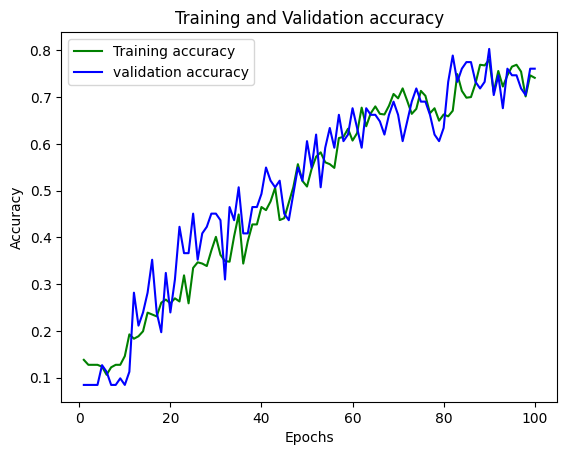

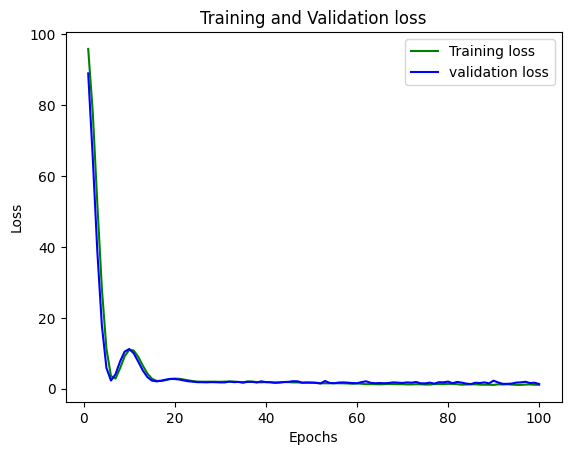

In [ ]:
plot_model_accuracy(history2)
plot_model_loss(history2)

**Drugi pokušaj: CNN sa Batch normalizacijom i Adam optimizatorom**  

Iz prethodnog primjera uz korištenje SGD optimizatora i momentuma još uvjek je prisutan blagi overfit. Da bi CNN bio jednostavniji koristiti će se sljedeća 2 hiuperparametara a to je Batch normalizacija koja će u nadi pojednostaviti i udubiti model mreže te za zamjenu SGD-a koristiti će se već posznati optimizator Adam.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), padding='same', input_shape=(50, 50, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))


model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model.fit(
   train_datagen.flow(x_train, y_train),
    batch_size=256,
    epochs=100,
    validation_data=(x_valid, y_valid)
)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_73 (Conv2D)                   │ (None, 50, 50, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 25, 25, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 25, 25, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 12, 12, 256)         │           1,0

 Total params: 6,947,978 (26.50 MB)

 Trainable params: 6,944,394 (26.49 MB)

 Non-trainable params: 3,584 (14.00 KB)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.0978 - loss: 99.9667 - val_accuracy: 0.1268 - val_loss: 98.5557
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.1617 - loss: 98.6689 - val_accuracy: 0.1268 - val_loss: 97.7598
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.1920 - loss: 97.6585 - val_accuracy: 0.1268 - val_loss: 96.9699
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.2733 - loss: 96.6309 - val_accuracy: 0.1268 - val_loss: 96.1866
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3465 - loss: 95.7025 - val_accuracy: 0.1268 - val_loss: 95.4188
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.3152 - loss: 94.8825 - val_accuracy: 0.1268 - val_loss: 94.6414
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3628 - loss: 93.9869 - val_accuracy: 0.1127 - val_loss: 93.8764
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3803 - loss: 93.1059 -

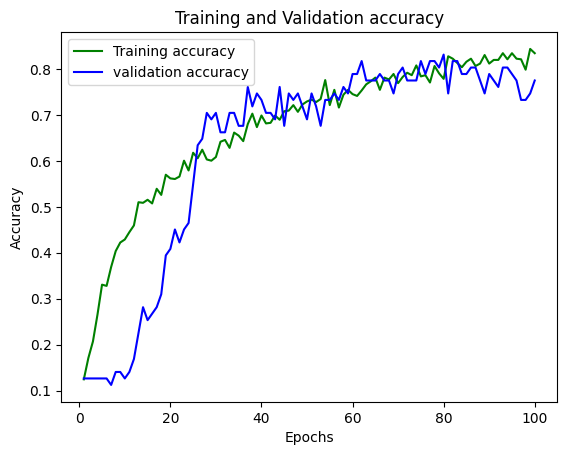

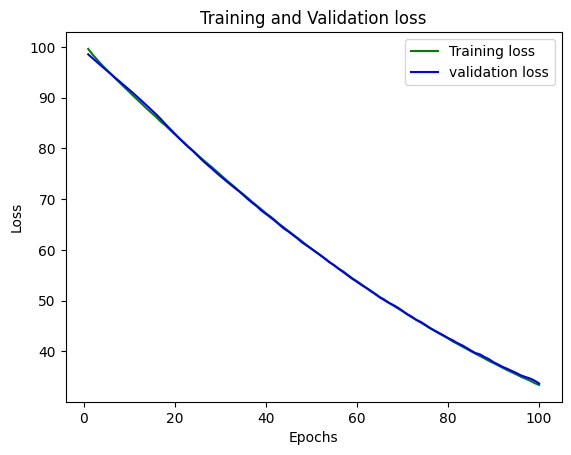

In [ ]:
plot_model_accuracy(history3)
plot_model_loss(history3)

**Treći pokušaj: CNN mreža sa upotrebom dropout regularizacije uz Adam Optimizator**   

Iz prethodnog primjera prisutan je blagi overfiting. Sljedeća taktika je umjesto Batch normalizacije koristiti dropout regularizaciju koja će nasumično ugasiti određeni postotak neurona. Koliki postotak neurona će se u skrivenim slojevima gasiti određujemo sami.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,(3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1) ))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history4 = model.fit(
    train_datagen.flow(x_train, y_train),
    batch_size=512,
    epochs=100,
    validation_data=(x_valid, y_valid)
)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_97 (Conv2D)                   │ (None, 50, 50, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_98 (Conv2D)                   │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_99 (Conv2D)                   │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_100 (Conv2D)                  │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_102 (Conv2D)                  │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 6,940,810 (26.48 MB)

 Trainable params: 6,940,810 (26.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 367ms/step - accuracy: 0.1089 - loss: 93.2189 - val_accuracy: 0.0845 - val_loss: 75.7845
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.1153 - loss: 70.6833 - val_accuracy: 0.0845 - val_loss: 56.7111
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.1179 - loss: 52.7902 - val_accuracy: 0.0986 - val_loss: 42.0598
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.1377 - loss: 39.1107 - val_accuracy: 0.0986 - val_loss: 31.0360
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.1457 - loss: 28.8281 - val_accuracy: 0.1549 - val_loss: 22.8414
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.1074 - loss: 21.1899 - val_accuracy: 0.1268 - val_loss: 16.8133
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.1816 - loss: 15.5356 - val_accuracy: 0.2394 - val_loss: 12.4401
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.2114 - loss: 11.5103 -

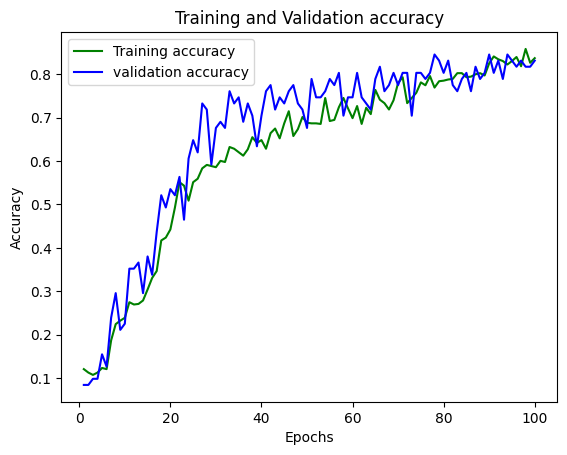

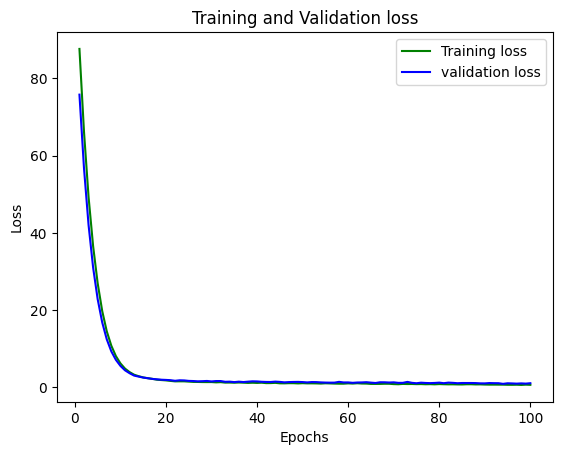

In [ ]:
plot_model_accuracy(history4)
plot_model_loss(history4)

**Rezultati točnosti CNN modela iz trećeg pokušaja na testnom skupu podataka**    

Nakon što je odabrana CNN mreža koja pokazuje solidne rezultate na trening i validaciji vrijeme je da se ispita točnost modela na testnom skupu podataka koje CNN model i preostali modeli nisu nikada vidjeli nakon treninga i validacije.



In [ ]:
y_pred2 = model.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(y_test, axis=1)

score2=model.evaluate(x_test, y_test)
score2

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 768ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step - accuracy: 0.8114 - loss: 0.8478


[0.8425238132476807, 0.8108108043670654]

**Stvaranje i prikaz konfuzijske matrice na temelju rezultata točnosti na testnom skupu podataka CNN modela**  

Nakon testiranja aktualnog posljednjeg modela na testnom skupu podataka slijedi podrobnija analiza rezultata točnosti modela gdje će se prikazati razlika u prepoznavanju i klasifikaciji istinite klase sa predviđenom klasom. Predviđena klasa je odgovor (država) modela na postavljeno pitanje tj. zadane testne slike zastave na tj. za koju misli da pripada toj klasi. Cijelobrojne vrijednosti na konfizijskoj matrici predstavljati će stupanj preciznosti klasifikacije npr od 1-5 gdje je 1 jako loše ili je jedva prepoznao ili 5 da je savršeno prepoznao i ako se npr 5 nalazi na presjeku matrice između istinite labele i predviđene, tada se može zaključiti da je ispravno klasificirao. Na primjeru FC mreže konfizijska matrica je implementirana na temelju rezultata treninga i validacije.




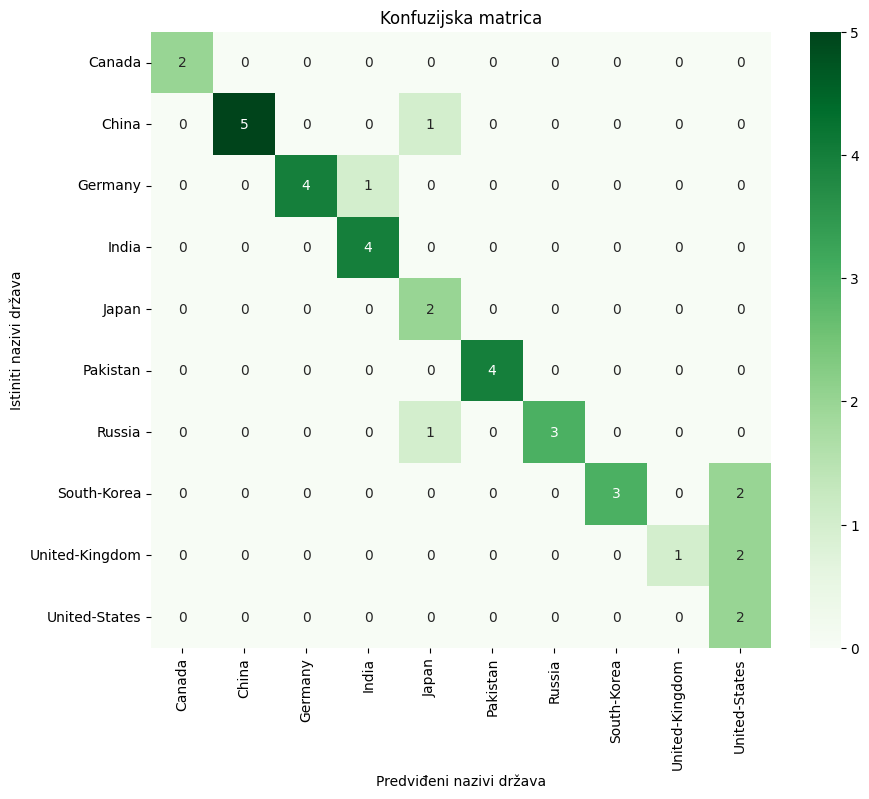

In [ ]:
state_names = ['Canada', 'China', 'Germany', 'India', 'Japan',
               'Pakistan', 'Russia', 'South-Korea', 'United-Kingdom', 'United-States']
conf_matrix = confusion_matrix(y_true2, y_pred_classes2)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens", xticklabels=state_names, yticklabels=state_names)
plt.xlabel('Predviđeni nazivi država')
plt.ylabel('Istiniti nazivi država')
plt.title('Konfuzijska matrica')
plt.show()

**Broj i prikaz pogrešnih klasifikacija zastava**   

Na sljedećem primjeru su prikazani parametri koji ukazuju koliko je CNN model u testu griješio te vizualno prikazuje slike zastava iz testnog skupa čije predviđene klase se razlikuju od istinite.

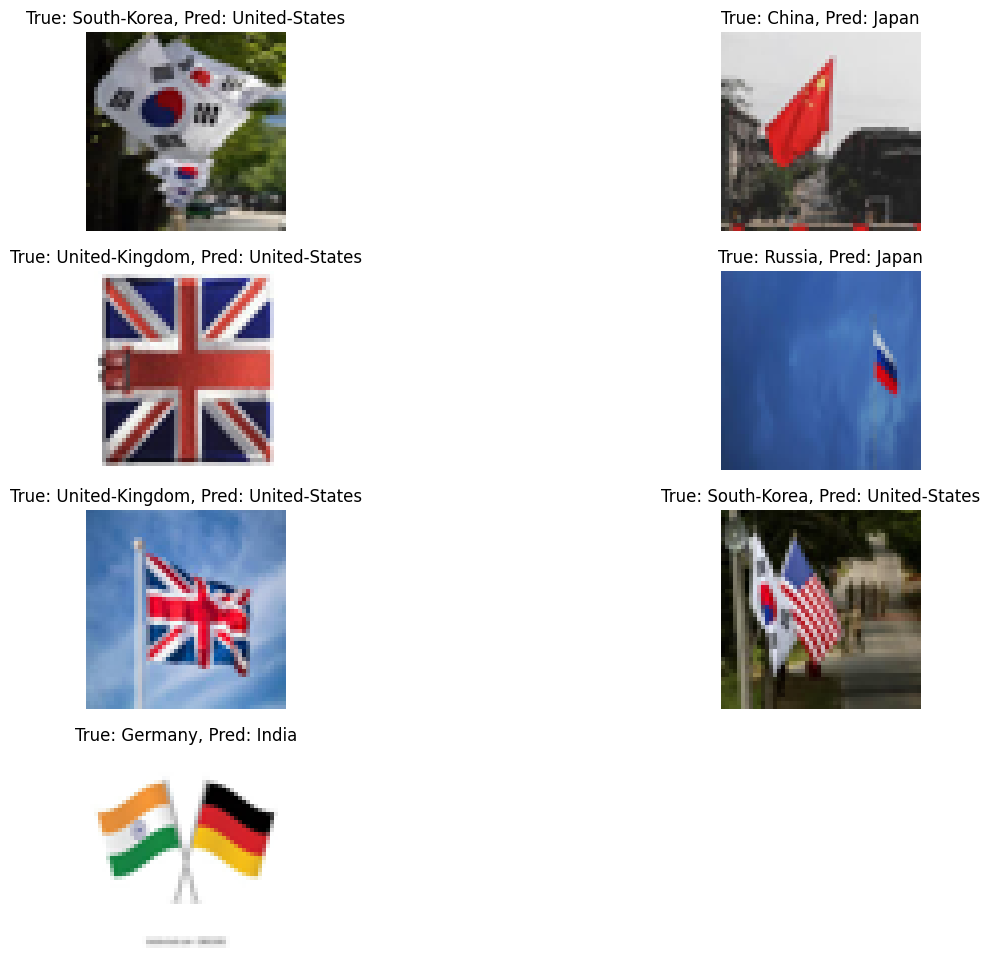

In [ ]:
broj_gresaka = 10
errors2 = np.where(y_pred_classes2 != y_true2)[0]
errors2

plt.figure(figsize=(15, 15))
for i, error_index in enumerate(errors2[:broj_gresaka]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[error_index])
    plt.title(f"True: {state_names[y_true2[error_index]]}, Pred: {state_names[y_pred_classes2[error_index]]}")
    plt.axis('off')
plt.show()

**Broj i prikaz ispravnih klasifikacija**   

Na sljedećem primjeru su prikazani parametri koji ukazuju koliko je CNN model bio točan tj. koliko se predviđenih klasa poklapa sa stvarnim klasama država.

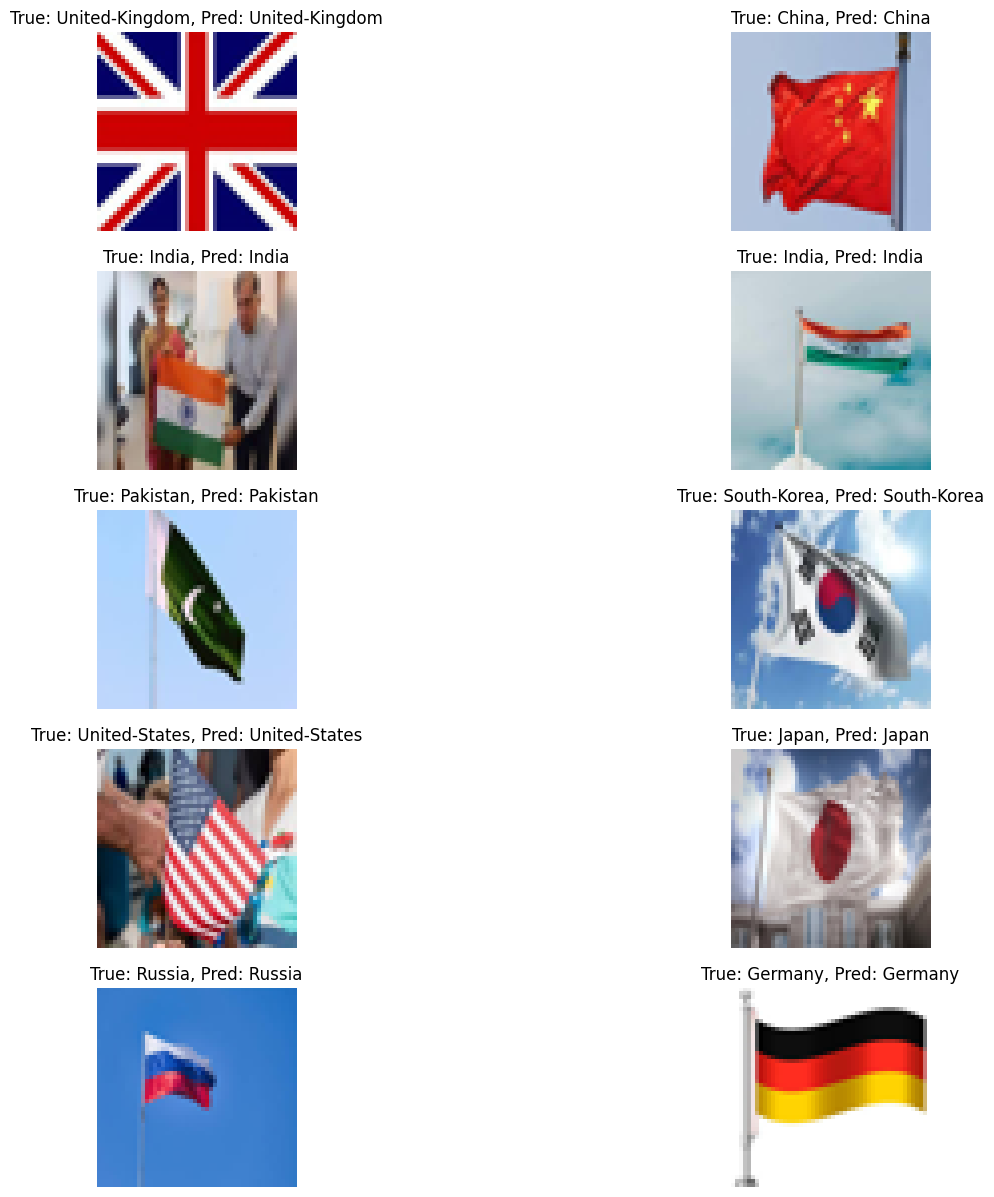

In [ ]:
broj_tocnih = 10

correct_indices = np.where(y_pred_classes2 == y_true2)[0]

correct_indices

plt.figure(figsize=(15, 15))
for i, correct_indices in enumerate(correct_indices[:broj_tocnih]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[correct_indices])
    plt.title(f"True: {state_names[y_true2[correct_indices]]}, Pred: {state_names[y_pred_classes2[correct_indices]]}")
    plt.axis('off')
plt.show()

#**Zaključak**    

Na temelju izgradnje 4 CNN mreža različitih optimizatora, regularizacija te drugih hiperparamatara može se zaključiti da najveća postignuta točnost CNN-ovih modela je do cca između 70 do 80 % točnosti u treniranju od trajanja 100 epoha. Za evaluaciju i analizu točnosti modela najviše su se istaknule CNN mreže sa Adam oprimizatorom i dropout regulrizacijom (na prvom mjestu ) te CNN mreža sa SGD optimizatorom uz momentum od 0.99. Za analizu i evaluaciju točnosti koristi se aktualno posljednji CNN sa Adam optimizatorom i dropout regularizacije zbog solidne točnosti na treningu i validaciji. Točnost na testnom skupu značajno je približna točnosti validaciji.

#**Neke CNN arhitekture**  

U sljedećim primjerima biti će prikazani procesi treninga i evaluacije barem 1 primjer CNN arhitekture te vidjeti kako CNN  dobro prepoznaje državvu na temelju zastava.


#**AlexNet arhitektura**  

Na sljedeće, primjeru je prikazana implementacija modela CNN AlexNet arhitekture. Prvi konvolucijski sloj ima 96 filtera dimenzije 11*11, pomaka (stride-a 4 ), psdding-a 0 maxpoolng sloja dimenzije 3*3 uz stride 2. Iza sloja je dodana BatchNormalization itd. Arhitektura AlexNet-a je prikazana na slici.   

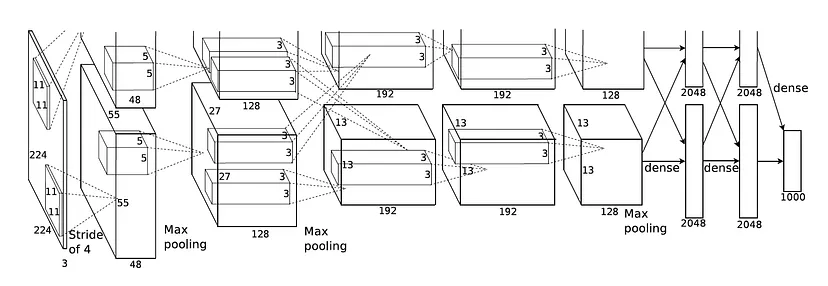

Na sljedećem primjeru je prikazana izgradnja, implementacija te trening CNN modela sa takvom arhitekturom koristeći isti skup podataka.

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(96, 11, strides=2, padding='same', activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((3, 3), strides=2))


model.add(layers.Conv2D(256, 5, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=2))

model.add(layers.Conv2D(384, 3, padding='same', activation='relu'))
model.add(layers.Conv2D(384, 3, padding='same', activation='relu'))


model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=2))


model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu',kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',
              metrics=['accuracy'])

history5 = model.fit(
    train_datagen.flow(x_train, y_train),
    epochs=100,
    batch_size=256,
    validation_data=(x_valid, y_valid)
)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_143 (Conv2D)                  │ (None, 25, 25, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_73 (MaxPooling2D)      │ (None, 12, 12, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_144 (Conv2D)                  │ (None, 12, 12, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_74 (MaxPooling2D)      │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_145 (Conv2D)                  │ (None, 5, 5, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_146 (Conv2D)                  │ (None, 5, 5, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_147 (Conv2D)                  │ (None, 5, 5, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_75 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_27 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,767,882 (94.48 MB)

 Trainable params: 24,767,882 (94.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.1128 - loss: 541.7761 - val_accuracy: 0.0845 - val_loss: 445.8692
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.1006 - loss: 418.6326 - val_accuracy: 0.0845 - val_loss: 342.2958
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1421 - loss: 320.8779 - val_accuracy: 0.0845 - val_loss: 261.2578
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1081 - loss: 244.6456 - val_accuracy: 0.0563 - val_loss: 198.3843
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.1304 - loss: 185.5523 - val_accuracy: 0.1972 - val_loss: 149.7939
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.1763 - loss: 139.9701 - val_accuracy: 0.1268 - val_loss: 112.6550
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1956 - loss: 105.0978 - val_accuracy: 0.2394 - val_loss: 84.1991
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2006 - los

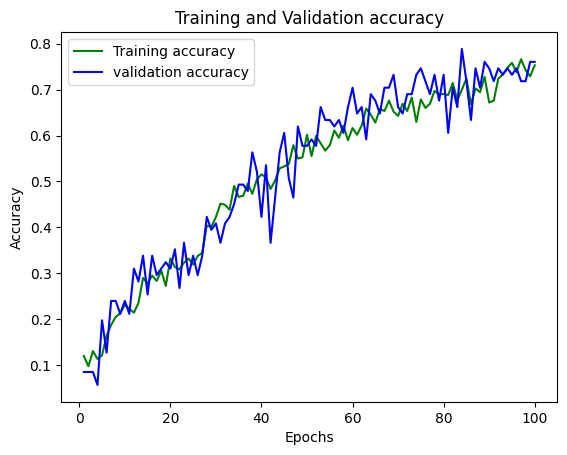

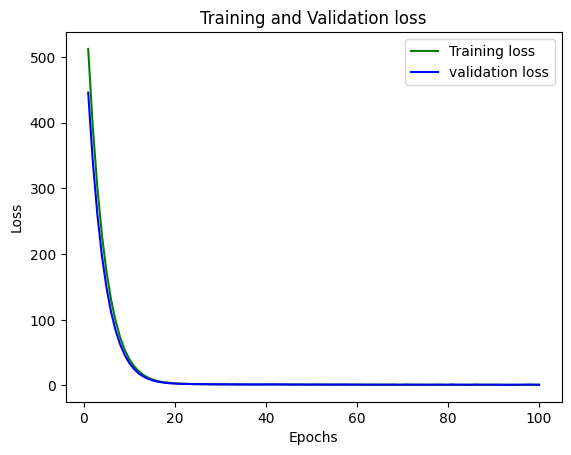

In [ ]:
plot_model_accuracy(history5)
plot_model_loss(history5)

In [ ]:
score3=model.evaluate(x_test, y_test)
score3

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - accuracy: 0.8398 - loss: 0.8685


[0.8480932712554932, 0.837837815284729]